# Solutions to homework week 2

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
# check working directory to debug path to loading
#import os
#os.getcwd()

# load the data
df = pd.read_csv('../data/car_fuel_efficiency.csv')

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`




In [75]:
def prepare_X(df, impute = ['zero', 'mean']):
    # columns of interest
    col_interest = [
        'engine_displacement'
        , 'horsepower'
        , 'vehicle_weight'
        , 'model_year'
        ]

    # avoid modification of input dataframe
    df = df[col_interest].copy()

    # impute missing 'horsepower'
    if impute == "zero":
        df['horsepower'] = df['horsepower'].fillna(0)
    elif impute == "mean":
        df['horsepower'] = df['horsepower'].fillna(
            df_train['horsepower'].mean())

    # extract numpy array
    X = df.values

    return(df)

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #graham matrix
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return(w[0], w[1:])

In [100]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [87]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #graham matrix
    XTX = X.T.dot(X)

    # regularization
    XTX_r = XTX + np.eye(XTX.shape[0]) * r
 
    XTX_inv = np.linalg.inv(XTX_r)
    w = XTX_inv.dot(X.T).dot(y)
    return(w[0], w[1:])

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

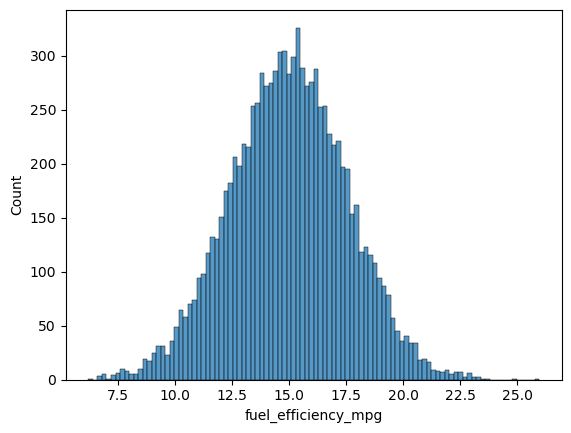

In [78]:
sns.histplot(df['fuel_efficiency_mpg'], bins=100)

In [79]:
fuel_max = df['fuel_efficiency_mpg'].max()
fuel_mean = df['fuel_efficiency_mpg'].mean()
fuel_quantile = df['fuel_efficiency_mpg'].quantile([0.25, 0.5, 0.75])
fuel_min = df['fuel_efficiency_mpg'].min()

print(
    'min = ', round(fuel_min, 2)
    , 'qtr25 = ', round(fuel_quantile.iloc[0], 2)
    , 'mean = ', round(fuel_mean, 2)
    , 'qtr50 = ', round(fuel_quantile.iloc[1], 2)
    , 'qtr75 = ', round(fuel_quantile.iloc[2], 2)
    , 'max = ', round(fuel_max, 2)
    )

min =  6.2 qtr25 =  13.27 mean =  14.99 qtr50 =  15.01 qtr75 =  16.71 max =  25.97


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [80]:
df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?


In [81]:
df.horsepower.quantile(0.5)

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [82]:
n = len(df)

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - (n_train + n_val)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:(n_train+n_val)]]
df_test = df.iloc[idx[(n_train+n_val):]]

# reset index (cosmetic)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# extract numpy array `.values`
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# avoid information leakage into training
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#print(n, len(df_train)+len(df_val)+len(df_test),len(df_train), len(df_val), len(df_test))
#df_train.head()


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [83]:
X_train_zero = prepare_X(df_train, 'zero')
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
X_val_zero = prepare_X(df_val, 'zero')
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
rmse_zero = rmse(y_val, y_pred_zero)

X_train_mean = prepare_X(df_train, 'mean')
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
X_val_mean = prepare_X(df_val, 'mean')
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse_mean = rmse(y_val, y_pred_mean)

print('RMSE (impute zero) = ', round(rmse_zero, 2))
print('RMSE (impute mean) = ', round(rmse_mean,2))

RMSE (impute zero) =  0.52
RMSE (impute mean) =  0.46


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [ ]:
X_train = prepare_X(df_train, 'zero')
X_val = prepare_X(df_val, 'zero')

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    rmse_r = rmse(y_val, y_pred)
    print('(r = ', r, '; RMSE = ', round(rmse_r, 2), ')')


(r =  0 ; RMSE =  0.5172 )
(r =  0.01 ; RMSE =  0.5169 )
(r =  0.1 ; RMSE =  0.5186 )
(r =  1 ; RMSE =  0.5221 )
(r =  5 ; RMSE =  0.5228 )
(r =  10 ; RMSE =  0.5229 )
(r =  100 ; RMSE =  0.523 )


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [105]:
rmse_list = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:(n_train+n_val)]]

    # reset index (cosmetic)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    # extract numpy array `.values`
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    # avoid information leakage into training
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, 'zero')
    X_val = prepare_X(df_val, 'zero')

    w0, w = train_linear_regression_reg(X_train, y_train, r=0)
    y_pred = w0 + X_val.dot(w)
    rmse_s = rmse(y_val, y_pred)

    rmse_list.append(rmse_s)

std = np.std(rmse_list)
round(std, 3)

np.float64(0.007)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [109]:
np.random.seed(9)

np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:(n_train+n_val)]]
df_test = df.iloc[idx[(n_train+n_val):]]

# reset index (cosmetic)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# extract numpy array `.values`
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# avoid information leakage into training
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Combine test and train
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

X_train = prepare_X(df_full_train, 'zero')
X_test = prepare_X(df_test, 'zero')

w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse_r = rmse(y_test, y_pred)

round(rmse_r, 3)

np.float64(0.506)